In [1]:
import numpy as np
import pandas as pd
import os
import re, string, six
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install dataprep
!pip install simpletransformers


     |████████████████████████████████| 9.5 MB 5.2 MB/s 
     |████████████████████████████████| 1.5 MB 49.7 MB/s 
     |████████████████████████████████| 943 kB 59.4 MB/s 
     |████████████████████████████████| 965 kB 45.2 MB/s 
     |████████████████████████████████| 95 kB 5.1 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 749 kB 60.3 MB/s 
     |████████████████████████████████| 78 kB 8.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 366 kB 60.1 MB/s 
     |████████████████████████████████| 132 kB 54.6 MB/s 
     |████████████████████████████████| 1.0 MB 53.7 MB/s 
     |████████████████████████████████| 10.9 MB 50.2 MB/s 
     |████████████████████████████████| 1.1 MB 46.0 MB/s 
     |████████████████████████████████| 271 kB 69.0 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |██████

     |████████████████████████████████| 249 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 26.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 10.1 MB 60.7 MB/s 
     |████████████████████████████████| 4.0 MB 50.7 MB/s 
     |████████████████████████████████| 325 kB 67.6 MB/s 
     |████████████████████████████████| 1.8 MB 34.8 MB/s 
     |████████████████████████████████| 6.6 MB 50.7 MB/s 
     |████████████████████████████████| 596 kB 59.7 MB/s 
     |████████████████████████████████| 77 kB 7.6 MB/s 
     |████████████████████████████████| 895 kB 58.5 MB/s 
     |████████████████████████████████| 181 kB 59.5 MB/s 
     |████████████████████████████████| 144 kB 58.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 212 kB 68.4 MB/s 
     |████████████████████████████████| 127 kB 72.8 MB/s 
     |████████████████████████████████| 97 kB 8.7 MB/s 
     |████████████████

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
data = data.drop(columns = ['id','qid1','qid2'])
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
data.isnull().sum()

question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   question1     404287 non-null  object
 1   question2     404287 non-null  object
 2   is_duplicate  404287 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 12.3+ MB


In [8]:
# def clean_text(s):
#     try:
#         return re.sub("[^A-Za-z0-9]"," ", str(s)).encode('utf-8').decode('utf-8').lower().split()
#     except:
#         return ""
    
# data['question1'] = data['question1'].apply(lambda x: clean_text(x))
# data['question2'] = data['question2'].apply(lambda x: clean_text(x))
data.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk import pos_tag
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def preprocess(series):
  words = re.sub("[^A-Za-z0-9]"," ",str(series)).encode('utf-8').decode('utf-8').lower().split()

  #lemmatize words
  lemm = WordNetLemmatizer()
  #stpwords = stopwords.words('english')
  tag_questions = (set(['which', 'what', 'where','how','why',"who"]))
  stpwords = set(stopwords.words('english')) - tag_questions
  lemmitized = [lemm.lemmatize(word) for word in words if word not in stpwords]
  sent = ' '.join(lemmitized)
  return sent

In [11]:
nltk.download('omw-1.4')
data['question1'] =data['question1'].apply(preprocess)
data['question2'] =data['question2'].apply(preprocess)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [12]:
data.head()

,question1,question2,is_duplicate
0,what step step guide invest share market india,what step step guide invest share market,0
1,what story kohinoor koh noor diamond,what would happen indian government stole kohi...,0
2,how increase speed internet connection using vpn,how internet speed increased hacking dns,0
3,why mentally lonely how solve,find remainder math 23 24 math divided 24 23,0
4,which one dissolve water quikly sugar salt met...,which fish would survive salt water,0


In [13]:
# !pip install BERTSimilarity

In [14]:
# !pip install sentence_transformers
# sen = [
#     "Three years later, the coffin was still full of Jello.",
#     "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
#     "The person box was packed with jelly many dozens of months later.",
#     "He found a leprechaun in his walnut shell."
# ]
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('bert-base-nli-mean-tokens')
# #Encoding:
# sen_embeddings = model.encode(sen)
# sen_embeddings.shape

In [15]:
# import BERTSimilarity.BERTSimilarity as bertsimilarity

# bertsimilarity=bertsimilarity.BERTSimilarity()

# if __name__=='__main__':
#     distances=[]
#     for i in range(len(data[])):
#         q1=data['question1'][i]
#         q2=data['question2'][i]
#         z=bertsimilarity.calculate_distance(q1,q2)
#         distances.append(z)
#     print(distances) 

In [16]:
# print(len(distances)) 

In [17]:
# from sklearn import svm
# from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score

# y = data.iloc[:5435, 2].values
# x = pd.DataFrame(distances)
# x = x.iloc[:5435, 0].values
# X_train , X_test , y_train, y_test = train_test_split(x, y, test_size = 0.2,)

# X_train= X_train.reshape(-1, 1)
# y_train= y_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)

# model = svm.SVC(kernel='linear')
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)

# #accuracy
# print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [18]:
# labels = ["0" , "1"]
# pred = [len(y_pred[y_pred == 1]), len(y_pred[y_pred == 0])]
# test = [len(y_test[y_test == 1]), len(y_test[y_test == 0])]

# x = np.arange(len(labels))  # the label locations
# width = 0.35  # the width of the bars

# fig, ax = plt.subplots()
# rects1 = ax.bar(x - width/2, pred, width, label='Predicted')
# rects2 = ax.bar(x + width/2, test, width, label='Truth')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('count')
# ax.set_title('prediction comparision')
# ax.set_xticks(x)
# ax.legend()

# fig.tight_layout()

# plt.show()

In [19]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# cm = confusion_matrix(y_test, y_pred)
# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [20]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

In [21]:
import torch
from transformers import BertTokenizer

from simpletransformers.classification import ClassificationModel,ClassificationArgs

from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score

import matplotlib.pyplot as plt

from transformers import BertTokenizer, TFBertForSequenceClassification, TFBertModel, TFRobertaForSequenceClassification, RobertaTokenizer
from transformers import TFDistilBertModel, DistilBertTokenizer, TFDistilBertForSequenceClassification, ElectraTokenizer, TFElectraForSequenceClassification

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [22]:
# logging.basicConfig(level=logging.INFO)
# transformers_logger = logging.getLogger("transformers")
# transformers_logger.setLevel(logging.WARNING)

In [23]:
cuda_available = torch.cuda.is_available()
model_args =ClassificationArgs( num_train_epochs=10,
                               train_batch_size = 64,
                               overwrite_output_dir = True,
                               save_eval_checkpoints=False,
                               save_steps = -1,
                               tokenizer_name = BertTokenizer)

In [24]:
torch.cuda.empty_cache()

In [25]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted')
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_true, y_pred, average='macro')

    return accuracy, precision, recall, f1_score

In [26]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [27]:
bert_train_data =data[['question1', 'question2', 'is_duplicate']].rename(columns={'question1': "text_a", 'question2':"text_b", 'is_duplicate':'labels'})

In [28]:
bert_train_data = bert_train_data.sample(10000, random_state = 2)

In [29]:
bert_train_data, bert_validation_data = train_test_split( bert_train_data, test_size=0.20, random_state=42)
bert_train_data.head()

,text_a,text_b,labels
325711,what mongol effect overland trade,what effect trade sanction imposed russia u ec...,0
224476,which b2c web service getting popular usa,what payload web service,0
310266,why hair grow faster one side body,what scientific explanation fact beard grows f...,0
2304,what might cause brown discharge menstrual cyc...,why get brown discharge menstrual cycle,1
393054,what chemical property liquid octane,what chemical property octane,0


In [30]:
bert_train_data = shuffle(bert_train_data)
bert_validation_data = shuffle(bert_validation_data)

In [31]:
# bert_train_data=bert_train_data[:4000]
# bert_validation_data = bert_validation_data[:1000]

In [32]:
y_test = bert_validation_data[['labels']]

In [41]:
def setup_process_model(model_type, model_name):
    model = ClassificationModel(model_type,
                              model_name,
                              use_cuda =cuda_available,
                              args=model_args
                                )
    model.train_model(bert_train_data)
    y_pred, raw_outputs = model.predict(
      bert_validation_data[['text_a', 'text_b']].values.tolist())
    print(y_pred)
    y_test = bert_validation_data[['labels']]
    accuracy, precision, recall, f1_score = calculate_metrics(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1_score

In [34]:
# bert_validation_data[['text_a', 'text_b']].values.tolist()

In [35]:
evaluation_df = pd.DataFrame(columns = ['Model Type', 'Model Name', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
evaluation_df.head()

,Model Type,Model Name,Accuracy,Precision,Recall,F1_score


In [36]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [37]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/478M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1 1 0 ... 0 0 0]


,Model Type,Model Name,Accuracy,Precision,Recall,F1_score
0,roberta,roberta-base,0.813,0.814536,0.813,0.803489


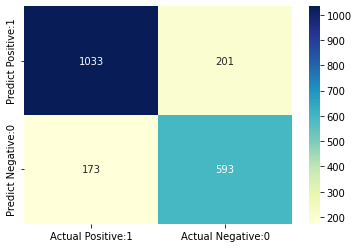

In [38]:
accuracy, precision, recall, f1_score = setup_process_model("roberta", "roberta-base")
evaluation_df.loc[len(evaluation_df)]   = ["roberta", "roberta-base", accuracy, precision, recall, f1_score]
evaluation_df.head()

In [39]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |     975 MB |    6887 MB |   24494 GB |   24493 GB |\n|       from large pool |     974 MB |    6884 MB |   24482 GB |   24481 GB |\n|       from small pool |       0 MB |       4 MB |      12 GB |      12 GB |\n|---------------------------------------------------------------------------|\n| Active memory         |     975 MB |    6887 MB |   24494 GB |   24493 GB |\n|       from large pool |     974 MB |    6884 MB |

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertForSequenceClassification: ['predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.bias', 'predictions.dense.weight', 'predictions.decoder.bias']
- This IS expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You sho

  0%|          | 0/8000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 

,Model Type,Model Name,Accuracy,Precision,Recall,F1_score
0,roberta,roberta-base,0.813,0.814536,0.813,0.803489
1,albert,albert-base-v2,0.791,0.789571,0.791,0.776947


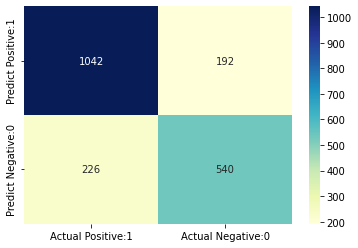

In [42]:
accuracy, precision, recall, f1_score = setup_process_model("albert", "albert-base-v2")
evaluation_df.loc[len(evaluation_df)]   = ["albert", "albert-base-v2", accuracy, precision, recall, f1_score]
evaluation_df.head()

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 

,Model Type,Model Name,Accuracy,Precision,Recall,F1_score
0,roberta,roberta-base,0.813,0.814536,0.813,0.803489
1,albert,albert-base-v2,0.791,0.789571,0.791,0.776947
2,bert,bert-base-cased,0.789,0.793128,0.789,0.779838


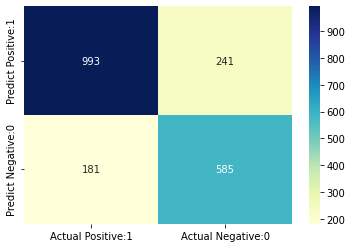

In [43]:
accuracy, precision, recall, f1_score = setup_process_model("bert", "bert-base-cased")
evaluation_df.loc[len(evaluation_df)]   = ["bert", "bert-base-cased", accuracy, precision, recall, f1_score]
evaluation_df.head()

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 

,Model Type,Model Name,Accuracy,Precision,Recall,F1_score
0,roberta,roberta-base,0.813,0.814536,0.813,0.803489
1,albert,albert-base-v2,0.791,0.789571,0.791,0.776947
2,bert,bert-base-cased,0.789,0.793128,0.789,0.779838
3,bert,bert-base-uncased,0.802,0.807968,0.802,0.794339


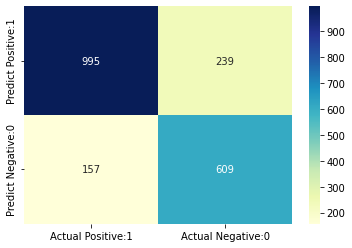

In [44]:
accuracy, precision, recall, f1_score = setup_process_model("bert", "bert-base-uncased")
evaluation_df.loc[len(evaluation_df)]   = ["bert", "bert-base-uncased", accuracy, precision, recall, f1_score]
evaluation_df.head()

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

  0%|          | 0/8000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

[0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 

,Model Type,Model Name,Accuracy,Precision,Recall,F1_score
0,roberta,roberta-base,0.8130,0.814536,0.8130,0.803489
1,albert,albert-base-v2,0.7910,0.789571,0.7910,0.776947
2,bert,bert-base-cased,0.7890,0.793128,0.7890,0.779838
3,bert,bert-base-uncased,0.8020,0.807968,0.8020,0.794339
4,distilbert,distilbert-base-uncased,0.7905,0.792947,0.7905,0.780396


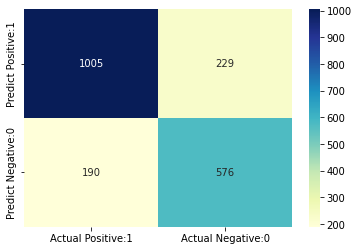

In [45]:
accuracy, precision, recall, f1_score = setup_process_model("distilbert", "distilbert-base-uncased")
evaluation_df.loc[len(evaluation_df)]   = ["distilbert", "distilbert-base-uncased", accuracy, precision, recall, f1_score]
evaluation_df.head()

Testing

In [92]:
test_data = pd.read_csv("test.csv", names = ["id", "text_a", "text_b"])

test_data = test_data.dropna()
test_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  for cell in nb.cells:


,id,text_a,text_b
0,test_id,question1,question2
1,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
2,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
3,2,What but is the best way to send money from Ch...,What you send money to China?
4,3,Which food not emulsifiers?,What foods fibre?


In [94]:
bert_test_data = test_data.sample(1000, random_state = 16)

bert_test_data['text_a'] =bert_test_data['text_a'].apply(preprocess)
bert_test_data['text_b'] =bert_test_data['text_b'].apply(preprocess)

bert_test_data = shuffle(bert_test_data)
bert_test_data.head()

,id,text_a,text_b
568197,568196,what ex girl friend still care love someone,what ex girl friendstill care love someone
3377911,2160231,how prepare law entrance,how critical prepare law entrance exam right c...
404802,404801,what circumcision would democrat choosing hill...,support bernie reduce sander lean libertarian ...
3308309,2090629,how quickly die shot heart,how die quickly without feeling anything
2540702,1323022,what best time 950 kerala india,use best time visit kerala


In [95]:
model = ClassificationModel("roberta",
                              "roberta-base",
                              use_cuda =cuda_available,
                              args=model_args
                                )
y_pred, raw_outputs = model.predict(bert_test_data[["text_a", "text_b"]].values.tolist())
bert_test_data["label"] = y_pred

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/125 [00:00<?, ?it/s]

In [96]:
bert_test_data = bert_test_data.sample(1000, random_state = 42)
bert_test_data.head()

,id,text_a,text_b,label
50777,50776,without changing frequency how transformer wor...,fourier transform similar transform every fiel...,0
2389471,1171791,force u moon,how net,0
607661,607660,what tip hack incoming university minnesota,what tip hack incoming freshman university,0
31875,31874,what best way learn shorthand best book availa...,what important thing ever learned traveling book,0
3116560,1898880,where inner city artist creatives live canada,how travel cracow warsaw,0
